<a href="https://colab.research.google.com/github/LishaRudani/Python_repo/blob/main/Heart_disease_prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I. Importing essential libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## II. Importing and understanding our dataset 

In [7]:
dataset = pd.read_csv("/content/drive/MyDrive/heart_dataset/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

#### Shape of dataset

In [ ]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


to generate a sample random row or column

In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
186,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
206,59,1,0,110,239,0,0,142,1,1.2,1,1,3,0
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1


#### Description

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Inference : there is no missing values

#### Analysing the 'target' variable

In [ ]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

#this is a classification problem, with the target variable as binary value

### Checking correlation between columns and the target variable

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

<AxesSubplot:xlabel='target', ylabel='count'>

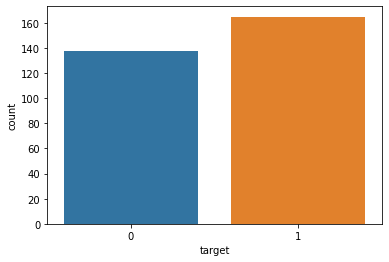

In [ ]:
y = dataset["target"]
sns.countplot(y)

### Analysing the 'Gender' feature

In [ ]:
dataset["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

Inference : The dataset is quite imbalanced

<AxesSubplot:xlabel='sex', ylabel='target'>

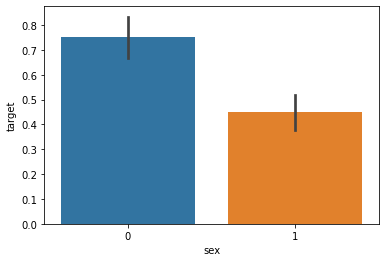

In [ ]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [ ]:
dataset["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

##### As expected, the CP feature has values from 0 to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

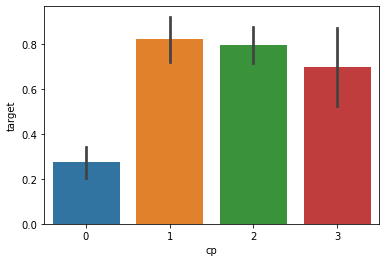

In [ ]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [ ]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='target'>

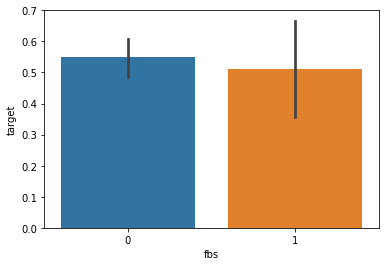

In [ ]:
sns.barplot(dataset["fbs"],y)

### Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

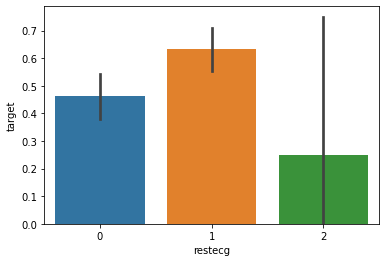

In [ ]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [ ]:
dataset["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

<AxesSubplot:xlabel='exang', ylabel='target'>

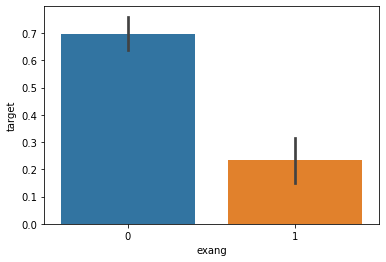

In [ ]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [ ]:
dataset["slope"].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='target'>

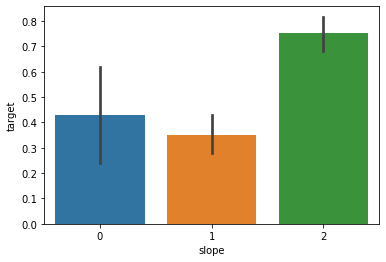

In [ ]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

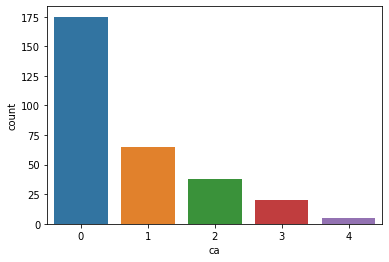

In [ ]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

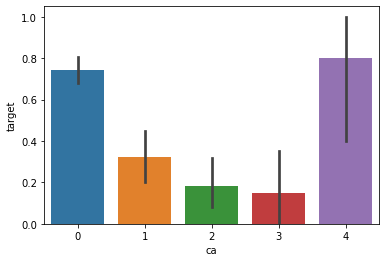

In [ ]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [ ]:
dataset["thal"].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='target'>

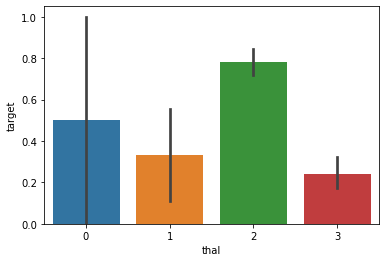

In [ ]:
sns.barplot(dataset["thal"],y)

## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
y_train.shape

(242,)

In [ ]:
y_test.shape

(61,)

## V. Model Fitting

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression(solver='liblinear') # solver='liblinear'
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predictions=logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
s1=SVC()

In [ ]:
s1.fit(X_train,y_train)

SVC()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report 

In [ ]:
y_prediction=s1.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_prediction))

[[15 14]
 [ 4 28]]


In [ ]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_predict = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test,y_predict))

[[19 10]
 [13 19]]


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62        29
           1       0.66      0.59      0.62        32

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.63      0.62      0.62        61



### Neural Network

In [8]:

import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
# model.add(Dense(6,activation='relu'))
# model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(X_train,Y_train,epochs=300)

NameError: ignored

In [ ]:
Y_pred_nn = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
Y_pred_nn.shape

NameError: name 'Y_pred_nn' is not defined

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

NameError: name 'Y_pred_nn' is not defined

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

NameError: name 'accuracy_score' is not defined

In [ ]:
score_nn

NameError: name 'score_nn' is not defined

## VI. Output final score

In [ ]:
scores = [score_lr,score_svm,score_knn,score_nn]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

NameError: name 'score_lr' is not defined

NameError: name 'algorithms' is not defined

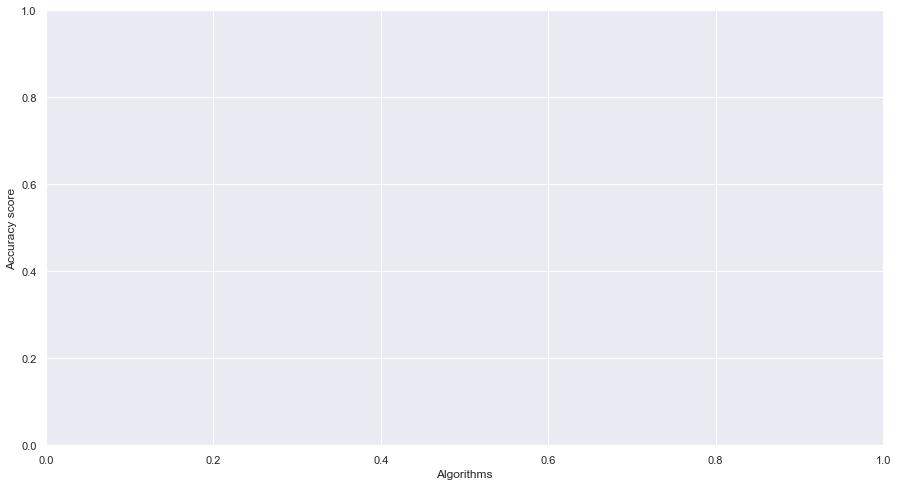

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)